<a href="https://colab.research.google.com/github/Digvijaypatil101/kalvium_data_task_loksabha/blob/main/Kalvium_task_loksabha_digvijay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size="+10">LOK SABHA ELECTIONS -2024 ANALYSIS</font>
TABLE OF CONTENTS:-



1.  Data retrived from Election Commision of India

2.  <font size="+2"> Distribution of Leading Parties

3.  No of Constituencies won by each party in pie chart

4.  <font size="+2"> Anti-Incumbency Effect on 2024 elections

5.  2019 Vs 2024 Difference in seats won by each party

6.  <font size="+2"> New Candidates Vs Incumbents in 2024

7.  Top 10 Constituencies with the Highest Margin

8.  Top 10 Constituencies with the Lowest Margin

9. <font size="+2"> Nifty 50 Indian Stock market Performance (1st of june to 8th of june, RESULT DATE : 4th june)

10. <font size="+2"> Adani Enterprise Stock performance during the week of election results( before results Vs after results)


NAME : DIGVIJAY PATIL
SRM INSTITUTE OF SCIENCE AND TECHNOLOGY
REG NO: RA2111003011633
Email: dp7519@srmist.edu.in



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

**<font size="+2"> 1. Data Retrieved from Election Commission of India**

The data for the Lok Sabha Elections 2024 was sourced from the Election Commission of India's official website. It includes information on constituency names, candidate details, party affiliations, margins of victory, and the status of the results.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()
import matplotlib.style
%matplotlib inline
import geopandas as gpd
from scipy.stats import describe
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from scipy.stats import skew, kurtosis

import warnings
warnings.filterwarnings('ignore')

In [3]:
DataFrame=pd.read_csv('election_results_2024.csv')

In [9]:
data.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


2.<font size="+2">  **Distribution of Leading Parties**

Here we analyze the distribution of seats won by different political parties across the country.

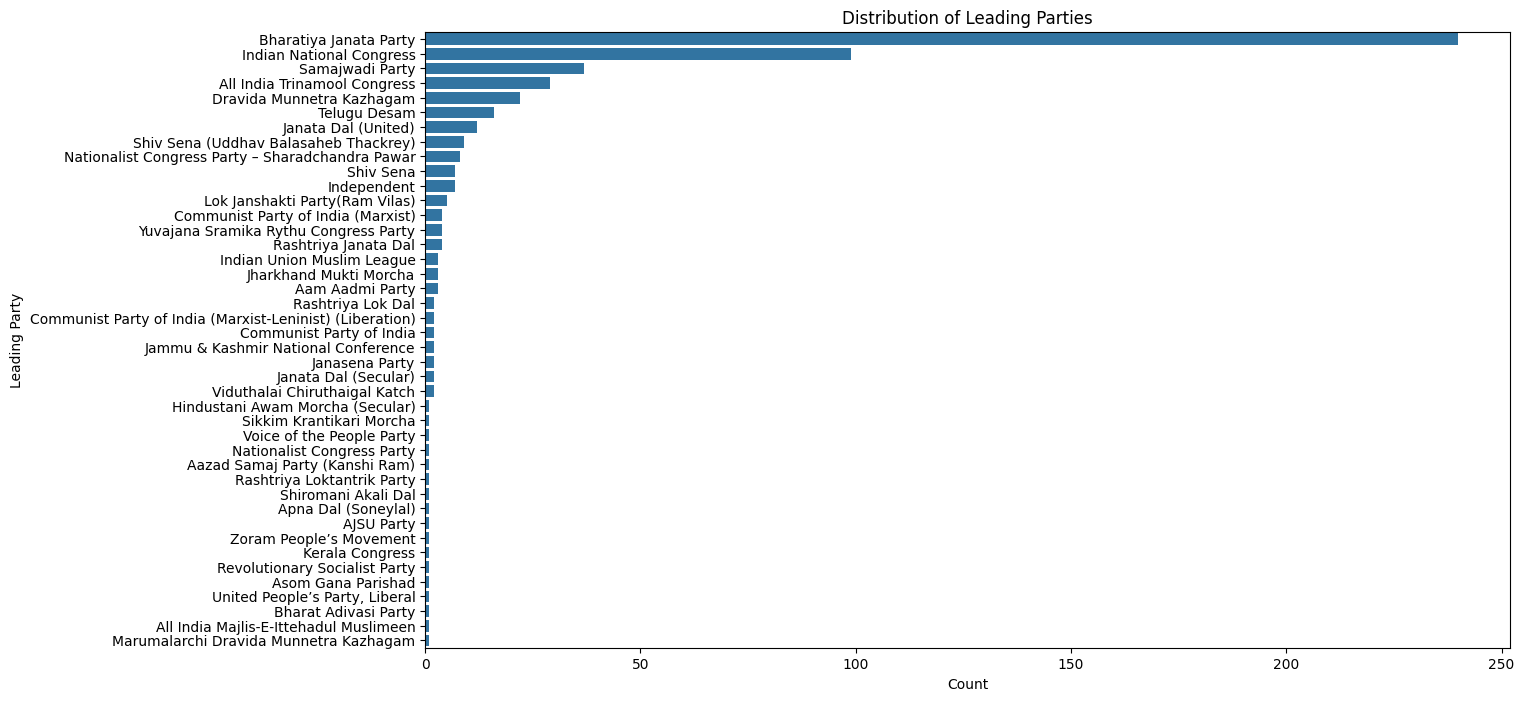

In [12]:
plt.figure(figsize=(14, 8))
sns.countplot(y='Leading Party', data=data, order=data['Leading Party'].value_counts().index)
plt.title('Distribution of Leading Parties')
plt.xlabel('Count')
plt.ylabel('Leading Party')
plt.show()

**3.<font size="+2">  Number of Constituencies Won by Each Party in Pie Chart**

Analysis:
This pie chart provides a visual representation of the proportion of constituencies won by each party.

In [18]:
import pandas as pd


df = pd.read_csv('election_results_2024.csv')

df.head()


,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


Saving election_results_2024.csv to election_results_2024 (2).csv


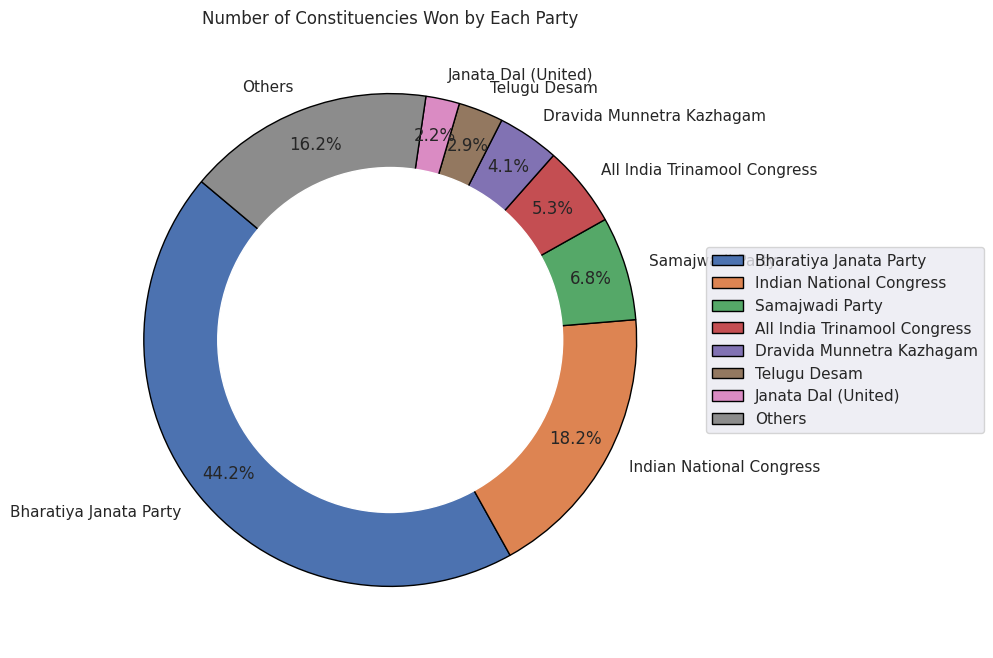

In [27]:
import pandas as pd
import matplotlib.pyplot as plt


from google.colab import files
uploaded = files.upload()

df = pd.read_csv('election_results_2024.csv')

constituencies_won = df['Leading Party'].value_counts()


threshold = 10
others = constituencies_won[constituencies_won < threshold].sum()
constituencies_won = constituencies_won[constituencies_won >= threshold]
constituencies_won['Others'] = others


plt.figure(figsize=(12, 8))
constituencies_won.plot.pie(
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    wedgeprops={'edgecolor': 'black'}
)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Number of Constituencies Won by Each Party')
plt.ylabel('')
plt.legend(labels=constituencies_won.index, loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()


**<font size="+2"> 4. Anti-Incumbency Effect on 2024 Elections**

Analysis:
Evaluate the impact of anti-incumbency by comparing the number of seats won by incumbents vs. new candidates.

Anti-Incumbency Summary:
Anti-Incumbency
True     604
False     76
Name: count, dtype: int64


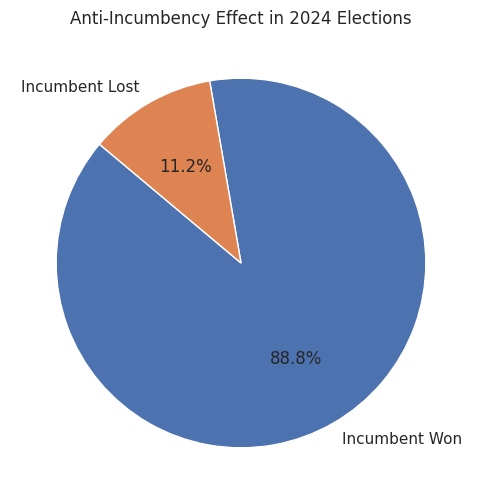

In [33]:
import pandas as pd
import matplotlib.pyplot as plt


df_2019 = pd.read_csv('/content/election_results_2019.csv')
df_2024 = pd.read_csv('/content/election_results_2024.csv')


incumbents_2019 = df_2019[['Constituency', 'Candidate', 'Party']]
incumbents_2019.columns = ['Constituency', '2019 Winner', '2019 Party']


results_2024 = df_2024[['Constituency', 'Leading Candidate', 'Leading Party']]
results_2024.columns = ['Constituency', '2024 Winner', '2024 Party']


comparison_df = pd.merge(incumbents_2019, results_2024, on='Constituency', how='outer')


comparison_df['Incumbent Won Again'] = comparison_df.apply(
    lambda row: row['2019 Winner'] == row['2024 Winner'], axis=1)

comparison_df['Anti-Incumbency'] = ~comparison_df['Incumbent Won Again']

# Summary of anti-incumbency
anti_incumbency_summary = comparison_df['Anti-Incumbency'].value_counts()

print("Anti-Incumbency Summary:")
print(anti_incumbency_summary)


plt.figure(figsize=(10, 6))
anti_incumbency_summary.plot(kind='pie', autopct='%1.1f%%', startangle=140, labels=['Incumbent Won', 'Incumbent Lost'])
plt.title('Anti-Incumbency Effect in 2024 Elections')
plt.ylabel('')
plt.show()


**5.<font size="+2">  2019 vs 2024 Difference in Seats Won by Each Party**

Analysis:
Compare the seat count differences between the 2019 and 2024 elections for each party

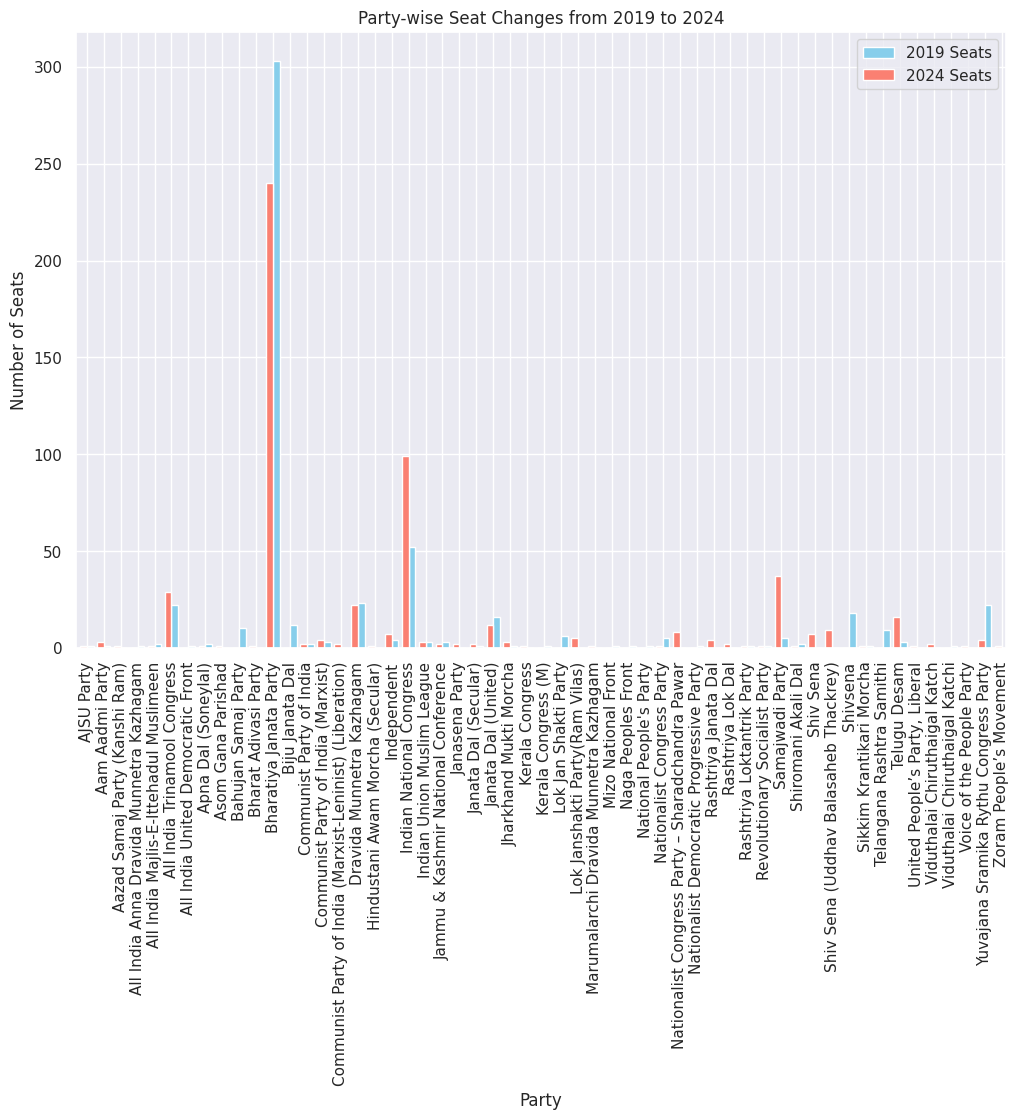

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

df_2019 = pd.read_csv('/content/election_results_2019.csv')
df_2024 = pd.read_csv('/content/election_results_2024.csv')

incumbents_2019 = df_2019[['Constituency', 'Candidate', 'Party']]
incumbents_2019.columns = ['Constituency', '2019 Winner', '2019 Party']

results_2024 = df_2024[['Constituency', 'Leading Candidate', 'Leading Party']]
results_2024.columns = ['Constituency', '2024 Winner', '2024 Party']

party_seats_2019 = incumbents_2019['2019 Party'].value_counts()
party_seats_2024 = results_2024['2024 Party'].value_counts()

party_comparison = pd.DataFrame({
    '2019 Seats': party_seats_2019,
    '2024 Seats': party_seats_2024
}).fillna(0)


fig, ax = plt.subplots(figsize=(12, 8))


party_comparison['2019 Seats'].plot(kind='bar', color='skyblue', position=0, width=0.4, ax=ax, label='2019 Seats')

party_comparison['2024 Seats'].plot(kind='bar', color='salmon', position=1, width=0.4, ax=ax, label='2024 Seats')


plt.title('Party-wise Seat Changes from 2019 to 2024')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.legend()

plt.show()


**6.<font size="+2">  New Candidates vs Incumbents in 2024**
Analysis:

This analysis highlights the performance of new candidates compared to incumbents in the 2024 elections.


New Candidate
False    546
True     134
Name: count, dtype: int64


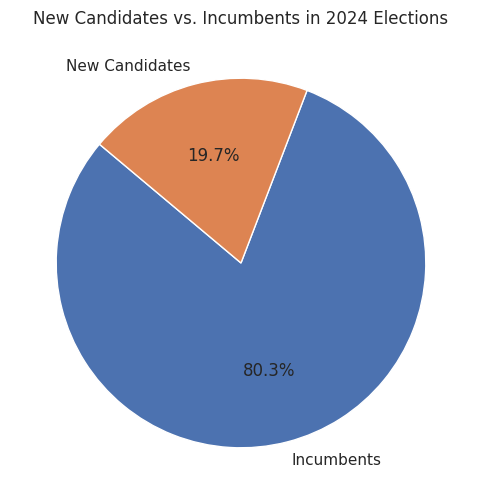

In [38]:

comparison_df['New Candidate'] = comparison_df['2019 Winner'].isnull()


new_vs_incumbents = comparison_df['New Candidate'].value_counts()
print(new_vs_incumbents)

      `
new_vs_incumbents.plot(kind='pie', autopct='%1.1f%%', labels=['Incumbents', 'New Candidates'], startangle=140, figsize=(10, 6))
plt.title('New Candidates vs. Incumbents in 2024 Elections')
plt.ylabel('')
plt.show()


<font size="+2"> **7. Top 10 Constituencies with the Highest Margin**

Analysis:
List and visualize the top 10 constituencies with the highest margins of victory.

In [61]:
import pandas as pd


df = pd.read_csv('election_results_2024.csv')


top_10_highest_margin = df.sort_values(by='Margin', ascending=False).head(10)
print("Top 10 Constituencies with Highest Margin:")
print(top_10_highest_margin[['Constituency', 'Const. No.', 'Leading Candidate', 'Leading Party', 'Margin']])


Top 10 Constituencies with Highest Margin:
         Constituency  Const. No.           Leading Candidate  \
39               Aska          19         ANITA SUBHADARSHINI   
246           Jaunpur          73         BABU SINGH KUSHWAHA   
92            Bellary           9                  E. TUKARAM   
258   KARAULI-DHOLPUR          10            BHAJAN LAL JATAV   
531     Valmiki Nagar           1                 SUNIL KUMAR   
154           Dharwad          11               PRALHAD JOSHI   
288          Keonjhar           4                ANANTA NAYAK   
344             Maval          33  SHRIRANG APPA CHANDU BARNE   
541  Yavatmal- Washim          14    SANJAY UTTAMRAO DESHMUKH   
372      Nagarkurnool          12               DR.MALLU RAVI   

                             Leading Party Margin  
39                  Bharatiya Janata Party  99974  
246                        Samajwadi Party  99335  
92                Indian National Congress  98992  
258               Indian National

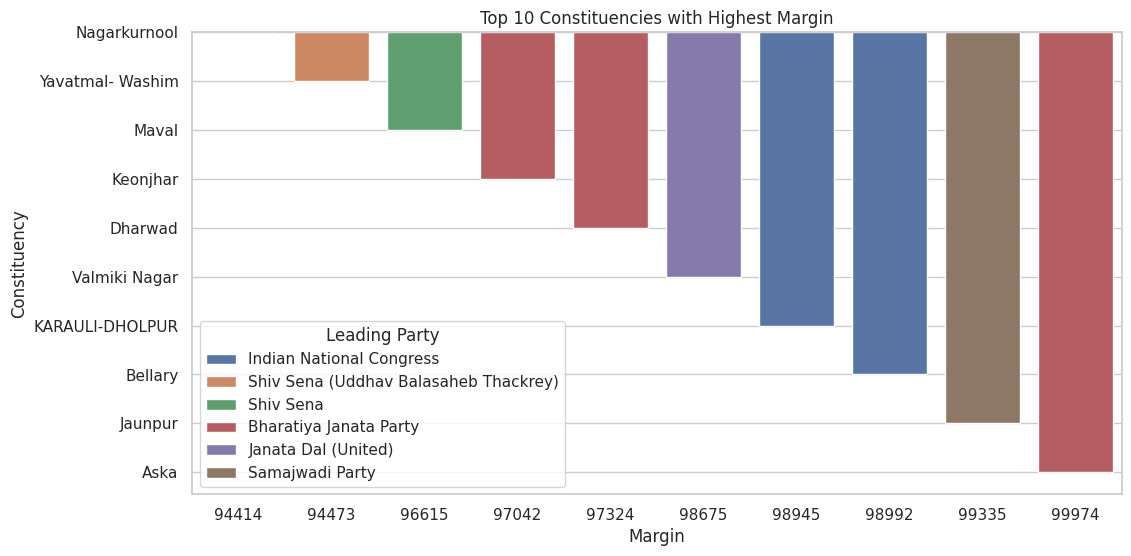

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Plotting the top 10 constituencies with the highest margin
plt.figure(figsize=(12, 6))
sns.barplot(x='Margin', y='Constituency', data=top_10_highest_margin.sort_values(by='Margin', ascending=True), hue='Leading Party', dodge=False)
plt.title('Top 10 Constituencies with Highest Margin')
plt.xlabel('Margin')
plt.ylabel('Constituency')
plt.legend(title='Leading Party')
plt.show()


<font size="+2"> **8. Top 10 Constituencies with the Lowest Margin**
Analysis:
List and visualize the top 10 constituencies with the lowest margins of victory.

In [66]:

top_10_lowest_margin = df.sort_values(by='Margin', ascending=True).head(10)
print("Top 10 Constituencies with Lowest Margin:")
print(top_10_lowest_margin[['Constituency', 'Const. No.', 'Leading Candidate', 'Leading Party', 'Margin']])


Top 10 Constituencies with Lowest Margin:
       Constituency  Const. No.                Leading Candidate  \
493           Surat          24   MUKESHKUMAR CHANDRAKAANT DALAL   
464          Sangli          44  VISHAL (DADA) PRAKASHBAPU PATIL   
283       Kasaragod           1                RAJMOHAN UNNITHAN   
37   Arunachal West           1                     KIREN RIJIJU   
87            Basti          61             RAM PRASAD CHAUDHARY   
157          Dhubri           2                  RAKIBUL HUSSAIN   
189            Gaya          38                 JITAN RAM MANJHI   
195           Godda           3                  NISHIKANT DUBEY   
248          Jhansi          46                    ANURAG SHARMA   
333     Maharajganj          19        JANARDAN SINGH "SIGRIWAL"   

                        Leading Party   Margin  
493            Bharatiya Janata Party        -  
464                       Independent   100053  
283          Indian National Congress   100649  
37           

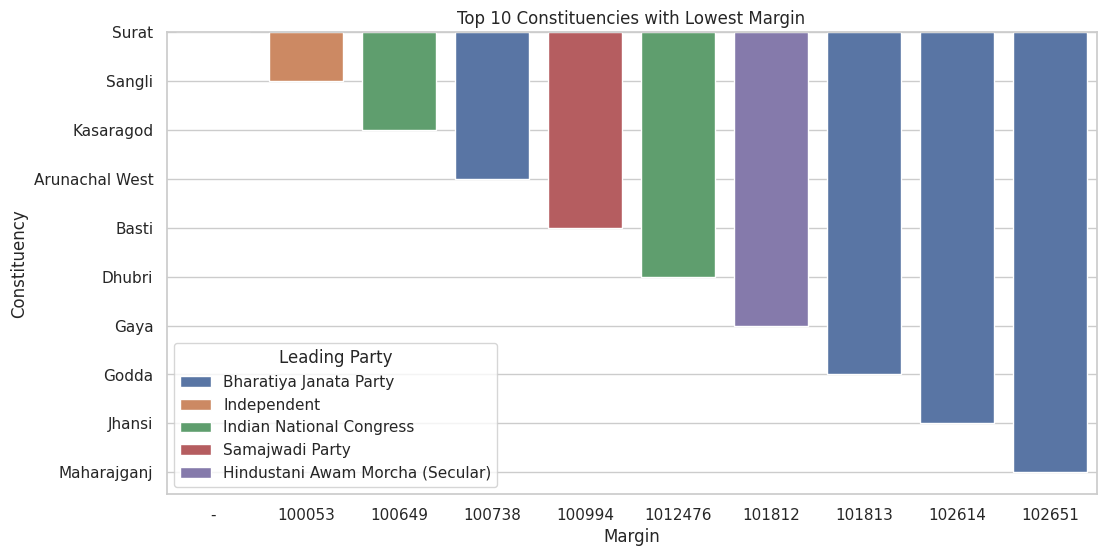

In [67]:

plt.figure(figsize=(12, 6))
sns.barplot(x='Margin', y='Constituency', data=top_10_lowest_margin.sort_values(by='Margin', ascending=True), hue='Leading Party', dodge=False)
plt.title('Top 10 Constituencies with Lowest Margin')
plt.xlabel('Margin')
plt.ylabel('Constituency')
plt.legend(title='Leading Party')
plt.show()


<font size="+2"> **9. Nifty 50 Indian Stock Market Performance (1st June to 8th June, Result Date: 4th June)**

Analysis:
Analyze and visualize the performance of the Nifty 50 index around the election result date.

In [68]:
!pip install yfinance

import yfinance as yf

# period around the election results
start_date = '2024-01-01'
end_date = '2024-06-30'

# Nifty 50 data
nifty50 = yf.download('^NSEI', start=start_date, end=end_date)
nifty50.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-01,21727.750000,21834.349609,21680.849609,21741.900391,21741.900391,154000
2024-01-02,21751.349609,21755.599609,21555.650391,21665.800781,21665.800781,263700
2024-01-03,21661.099609,21677.000000,21500.349609,21517.349609,21517.349609,311900
2024-01-04,21605.800781,21685.650391,21564.550781,21658.599609,21658.599609,339200
2024-01-05,21705.750000,21749.599609,21629.199219,21710.800781,21710.800781,309300


In [69]:
election_result_date = '2024-06-04'


In [70]:
# daily returns
nifty50['Daily Return'] = nifty50['Adj Close'].pct_change()

# cumulative returns
nifty50['Cumulative Return'] = (1 + nifty50['Daily Return']).cumprod()


before_election = nifty50[:election_result_date]
after_election = nifty50[election_result_date:]

# average returns and volatility
before_avg_return = before_election['Daily Return'].mean()
before_volatility = before_election['Daily Return'].std()
after_avg_return = after_election['Daily Return'].mean()
after_volatility = after_election['Daily Return'].std()

print(f"Before Election - Average Daily Return: {before_avg_return:.4f}, Volatility: {before_volatility:.4f}")
print(f"After Election - Average Daily Return: {after_avg_return:.4f}, Volatility: {after_volatility:.4f}")


Before Election - Average Daily Return: 0.0001, Volatility: 0.0099
After Election - Average Daily Return: 0.0019, Volatility: 0.0177


In [78]:
import yfinance as yf
import pandas as pd

#  period around the election results
start_date = '2024-06-01'
end_date = '2024-06-08'

#  Nifty 50 data
nifty50 = yf.download('^NSEI', start=start_date, end=end_date)
nifty50.index = pd.to_datetime(nifty50.index)
nifty50.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-03,23337.900391,23338.699219,23062.300781,23263.900391,23263.900391,569400
2024-06-04,23179.500000,23179.500000,21281.449219,21884.500000,21884.500000,1006100
2024-06-05,22128.349609,22670.400391,21791.949219,22620.349609,22620.349609,638500
2024-06-06,22798.599609,22910.150391,22642.599609,22821.400391,22821.400391,480400
2024-06-07,22821.849609,23320.199219,22789.050781,23290.150391,23290.150391,473600


In [79]:
election_result_date = pd.to_datetime('2024-06-04')


In [80]:

nifty50['Daily Return'] = nifty50['Adj Close'].pct_change()


nifty50['Cumulative Return'] = (1 + nifty50['Daily Return']).cumprod()


before_election = nifty50[:election_result_date]
after_election = nifty50[election_result_date:]


before_avg_return = before_election['Daily Return'].mean()
before_volatility = before_election['Daily Return'].std()
after_avg_return = after_election['Daily Return'].mean()
after_volatility = after_election['Daily Return'].std()

print(f"Before Election - Average Daily Return: {before_avg_return:.4f}, Volatility: {before_volatility:.4f}")
print(f"After Election - Average Daily Return: {after_avg_return:.4f}, Volatility: {after_volatility:.4f}")


Before Election - Average Daily Return: -0.0593, Volatility: nan
After Election - Average Daily Return: 0.0009, Volatility: 0.0414


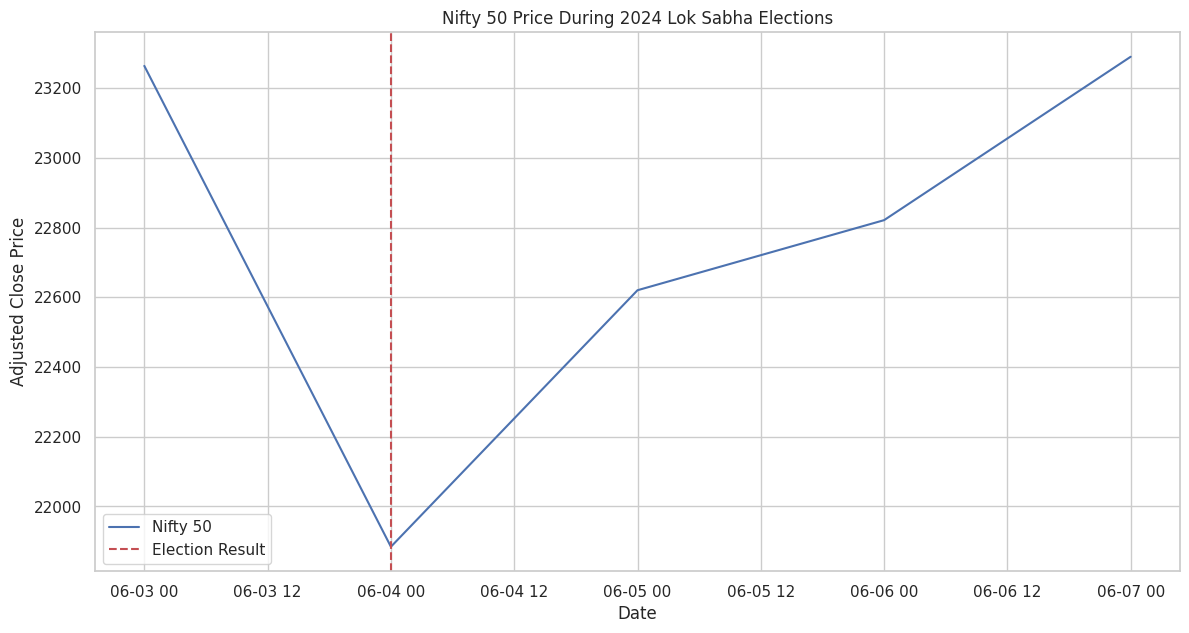

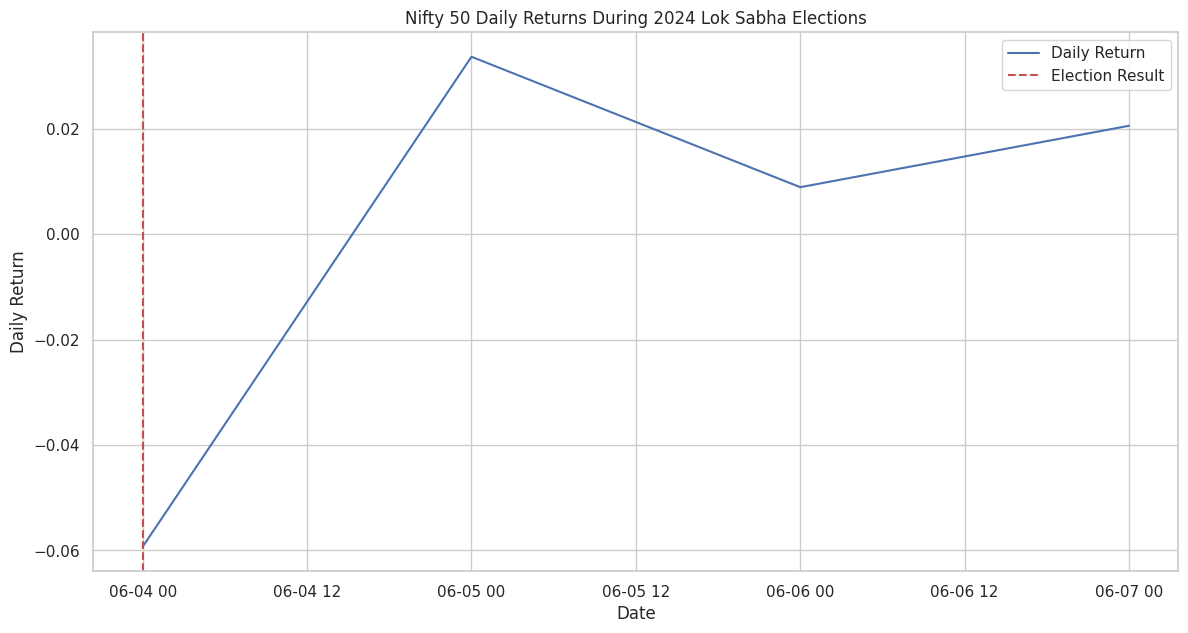

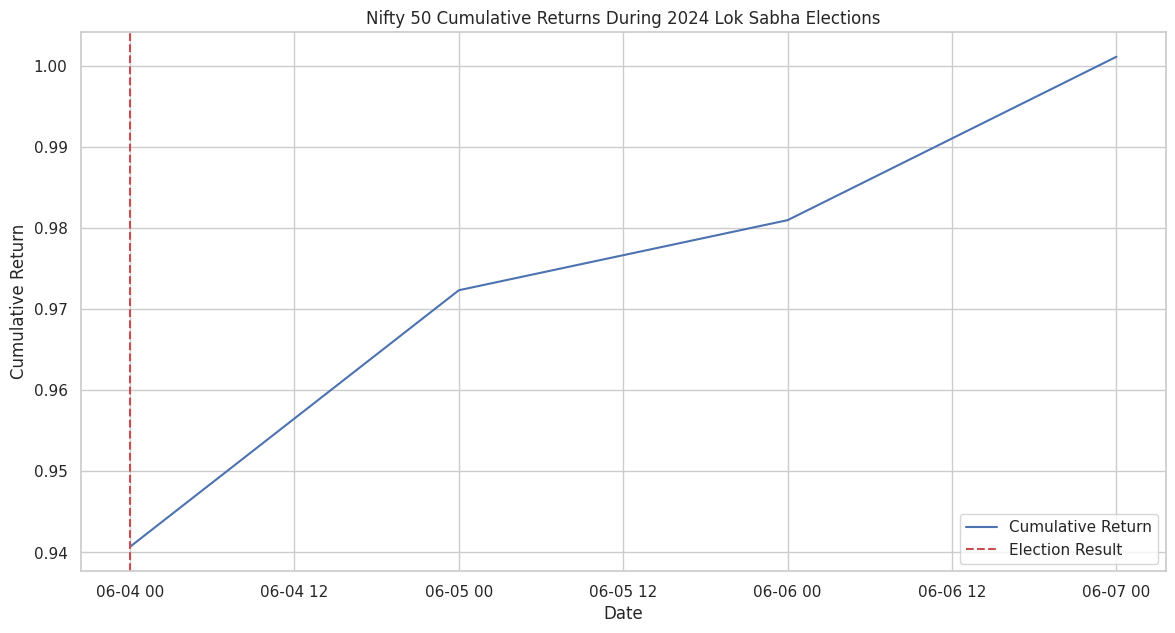

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Plot Adjusted Close Price
plt.figure(figsize=(14, 7))
plt.plot(nifty50.index, nifty50['Adj Close'], label='Nifty 50')
plt.axvline(x=election_result_date, color='r', linestyle='--', label='Election Result')
plt.title('Nifty 50 Price During 2024 Lok Sabha Elections')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

# Plot Daily Returns
plt.figure(figsize=(14, 7))
plt.plot(nifty50.index, nifty50['Daily Return'], label='Daily Return')
plt.axvline(x=election_result_date, color='r', linestyle='--', label='Election Result')
plt.title('Nifty 50 Daily Returns During 2024 Lok Sabha Elections')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

# Plot Cumulative Returns
plt.figure(figsize=(14, 7))
plt.plot(nifty50.index, nifty50['Cumulative Return'], label='Cumulative Return')
plt.axvline(x=election_result_date, color='r', linestyle='--', label='Election Result')
plt.title('Nifty 50 Cumulative Returns During 2024 Lok Sabha Elections')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()


<font size="+2"> **10. Adani Enterprise Stock Performance During the Week of Election Results (Before Results vs After Results)**
Analysis:
Analyze and visualize the performance of Adani Enterprises stock around the election result date.

In [83]:




start_date = '2024-06-01'
end_date = '2024-06-08'

# Getting the Adani Enterprises data
adani = yf.download('ADANIENT.NS', start=start_date, end=end_date)
adani.index = pd.to_datetime(adani.index)
adani.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-03,3725.000000,3743.899902,3586.050049,3645.250000,3643.780518,8511359
2024-06-04,3520.000000,3520.000000,2733.949951,2941.250000,2940.064453,20306909
2024-06-05,3030.000000,3150.000000,2750.000000,3115.350098,3114.094238,8778345
2024-06-06,3184.000000,3222.399902,3137.149902,3185.649902,3184.365723,5873271
2024-06-07,3170.399902,3233.750000,3151.600098,3219.550049,3218.252197,4740455


In [84]:
election_result_date = pd.to_datetime('2024-06-04')


In [85]:

adani['Daily Return'] = adani['Adj Close'].pct_change()


adani['Cumulative Return'] = (1 + adani['Daily Return']).cumprod()


before_election = adani[:election_result_date]
after_election = adani[election_result_date:]


before_avg_return = before_election['Daily Return'].mean()
before_volatility = before_election['Daily Return'].std()
after_avg_return = after_election['Daily Return'].mean()
after_volatility = after_election['Daily Return'].std()

print(f"Before Election - Average Daily Return: {before_avg_return:.4f}, Volatility: {before_volatility:.4f}")
print(f"After Election - Average Daily Return: {after_avg_return:.4f}, Volatility: {after_volatility:.4f}")


Before Election - Average Daily Return: -0.1931, Volatility: nan
After Election - Average Daily Return: -0.0252, Volatility: 0.1139


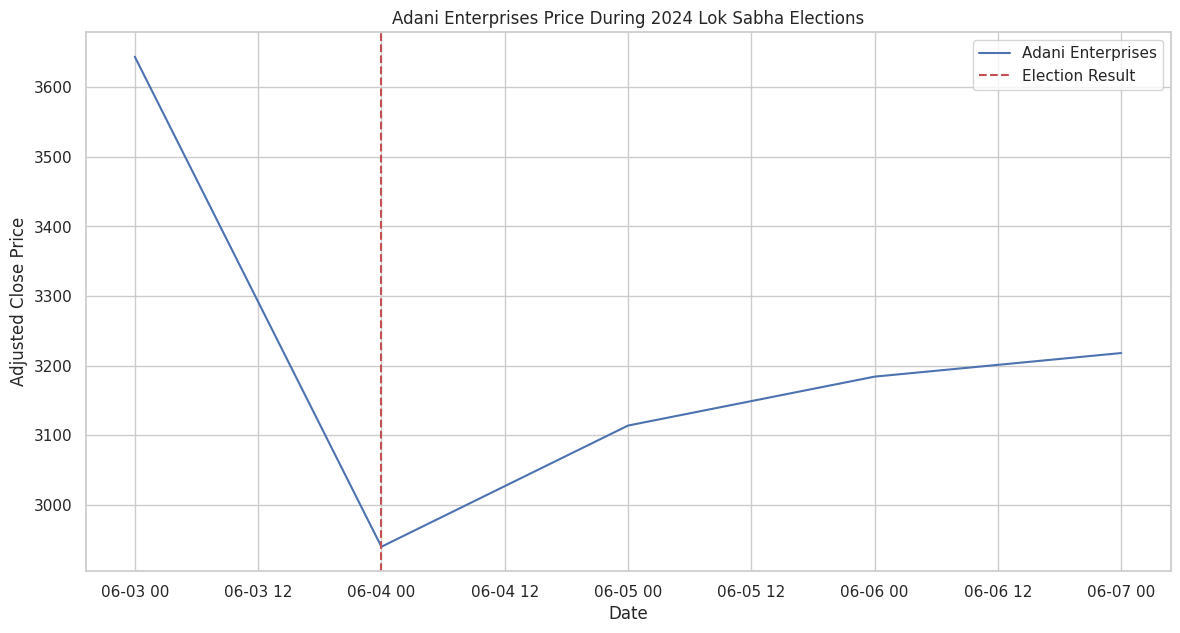

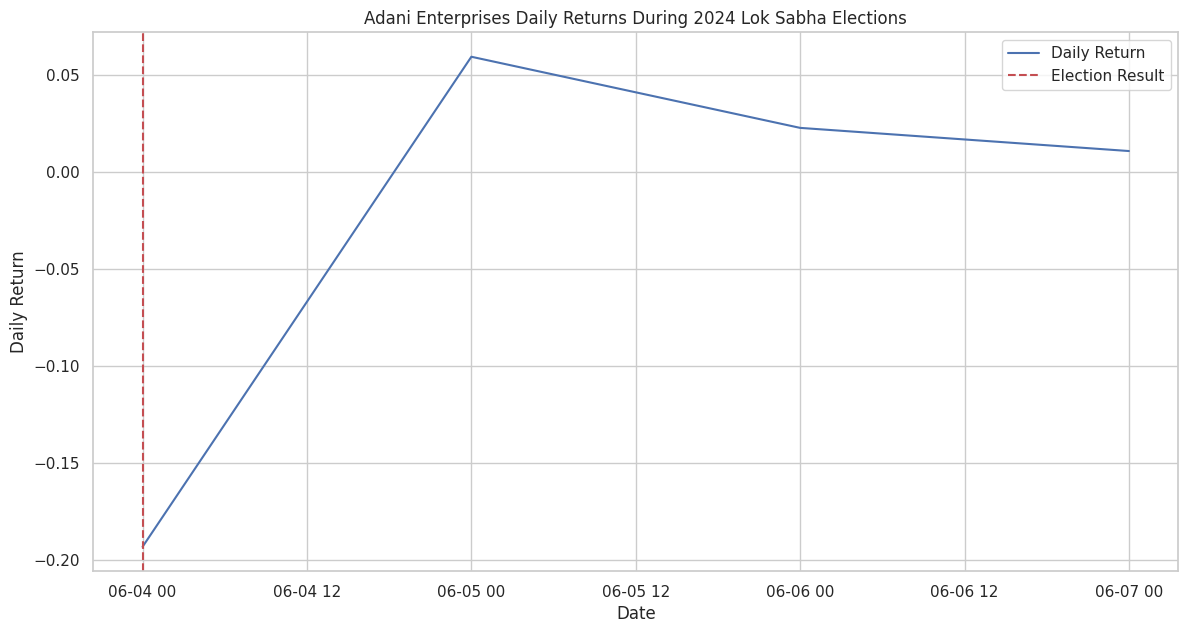

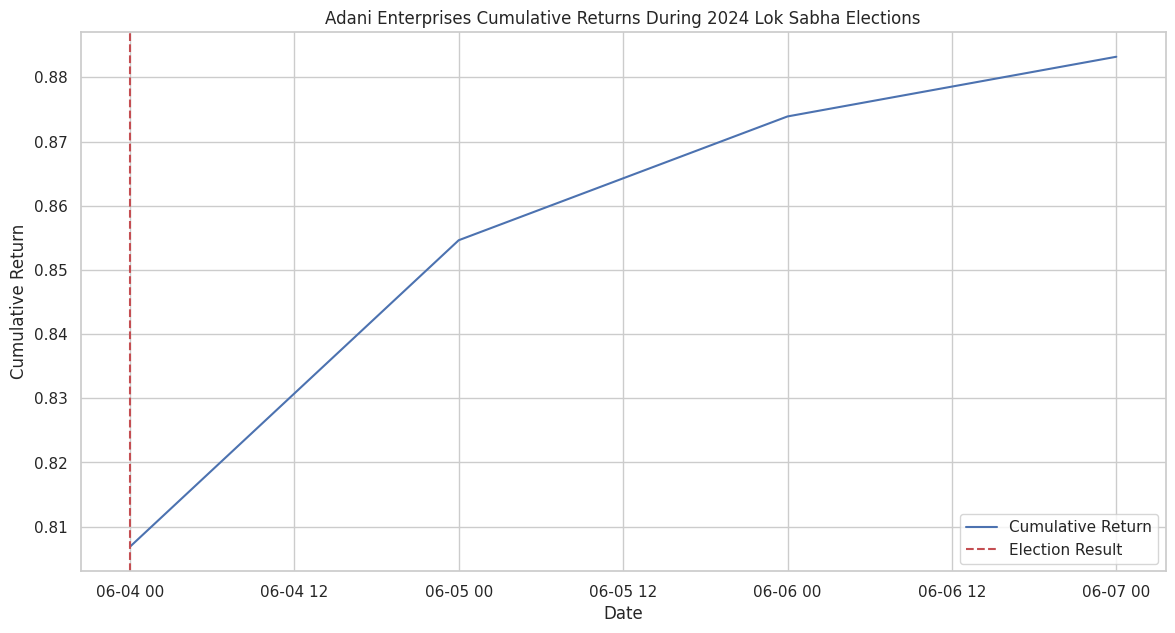

In [86]:
sns.set_style('whitegrid')


plt.figure(figsize=(14, 7))
plt.plot(adani.index, adani['Adj Close'], label='Adani Enterprises')
plt.axvline(x=election_result_date, color='r', linestyle='--', label='Election Result')
plt.title('Adani Enterprises Price During 2024 Lok Sabha Elections')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

# Plotting Daily Returns
plt.figure(figsize=(14, 7))
plt.plot(adani.index, adani['Daily Return'], label='Daily Return')
plt.axvline(x=election_result_date, color='r', linestyle='--', label='Election Result')
plt.title('Adani Enterprises Daily Returns During 2024 Lok Sabha Elections')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

# Plotting Cumulative Returns
plt.figure(figsize=(14, 7))
plt.plot(adani.index, adani['Cumulative Return'], label='Cumulative Return')
plt.axvline(x=election_result_date, color='r', linestyle='--', label='Election Result')
plt.title('Adani Enterprises Cumulative Returns During 2024 Lok Sabha Elections')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()
